In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("----------------------------------------------------------")

Age: Number of unique values 43
----------------------------------------------------------
Attrition: Number of unique values 2
----------------------------------------------------------
BusinessTravel: Number of unique values 3
----------------------------------------------------------
DailyRate: Number of unique values 886
----------------------------------------------------------
Department: Number of unique values 3
----------------------------------------------------------
DistanceFromHome: Number of unique values 29
----------------------------------------------------------
Education: Number of unique values 5
----------------------------------------------------------
EducationField: Number of unique values 6
----------------------------------------------------------
EmployeeCount: Number of unique values 1
----------------------------------------------------------
EmployeeNumber: Number of unique values 1470
----------------------------------------------------------
EnvironmentS

In [9]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

Categorical Features

In [10]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("------------------------------------------------------")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
------------------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
------------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
------------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
------------------------------------------------------
Gender : ['Female' 'Male']


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

Numerical Features

In [13]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [14]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("---------------------------------------------------------")

Age : Minimum: 18, Maximum: 60
---------------------------------------------------------
DailyRate : Minimum: 102, Maximum: 1499
---------------------------------------------------------
HourlyRate : Minimum: 30, Maximum: 100
---------------------------------------------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999
---------------------------------------------------------
MonthlyRate : Minimum: 2094, Maximum: 26999
---------------------------------------------------------
TotalWorkingYears : Minimum: 0, Maximum: 40
---------------------------------------------------------
YearsAtCompany : Minimum: 0, Maximum: 40
---------------------------------------------------------


Data Visualisation

In [15]:
import hvplot.pandas

In [16]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, 
               width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (Count)

In [17]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Count)

In [18]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (Count)

In [19]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (Count)

In [20]:
df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (Count)

In [21]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (Count)

In [22]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (Count)

In [23]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (Count)

In [24]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (Count)

In [25]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (Count)

In [26]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (Count)

In [27]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Count)

In [28]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (Count)

In [29]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (Count)

In [30]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (Count)

 Correlation Matrix

In [32]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

In [33]:
from sklearn.preprocessing import LabelEncoder

# Copy to avoid modifying original data
df_encoded = df.copy()

# Encode all object-type columns
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


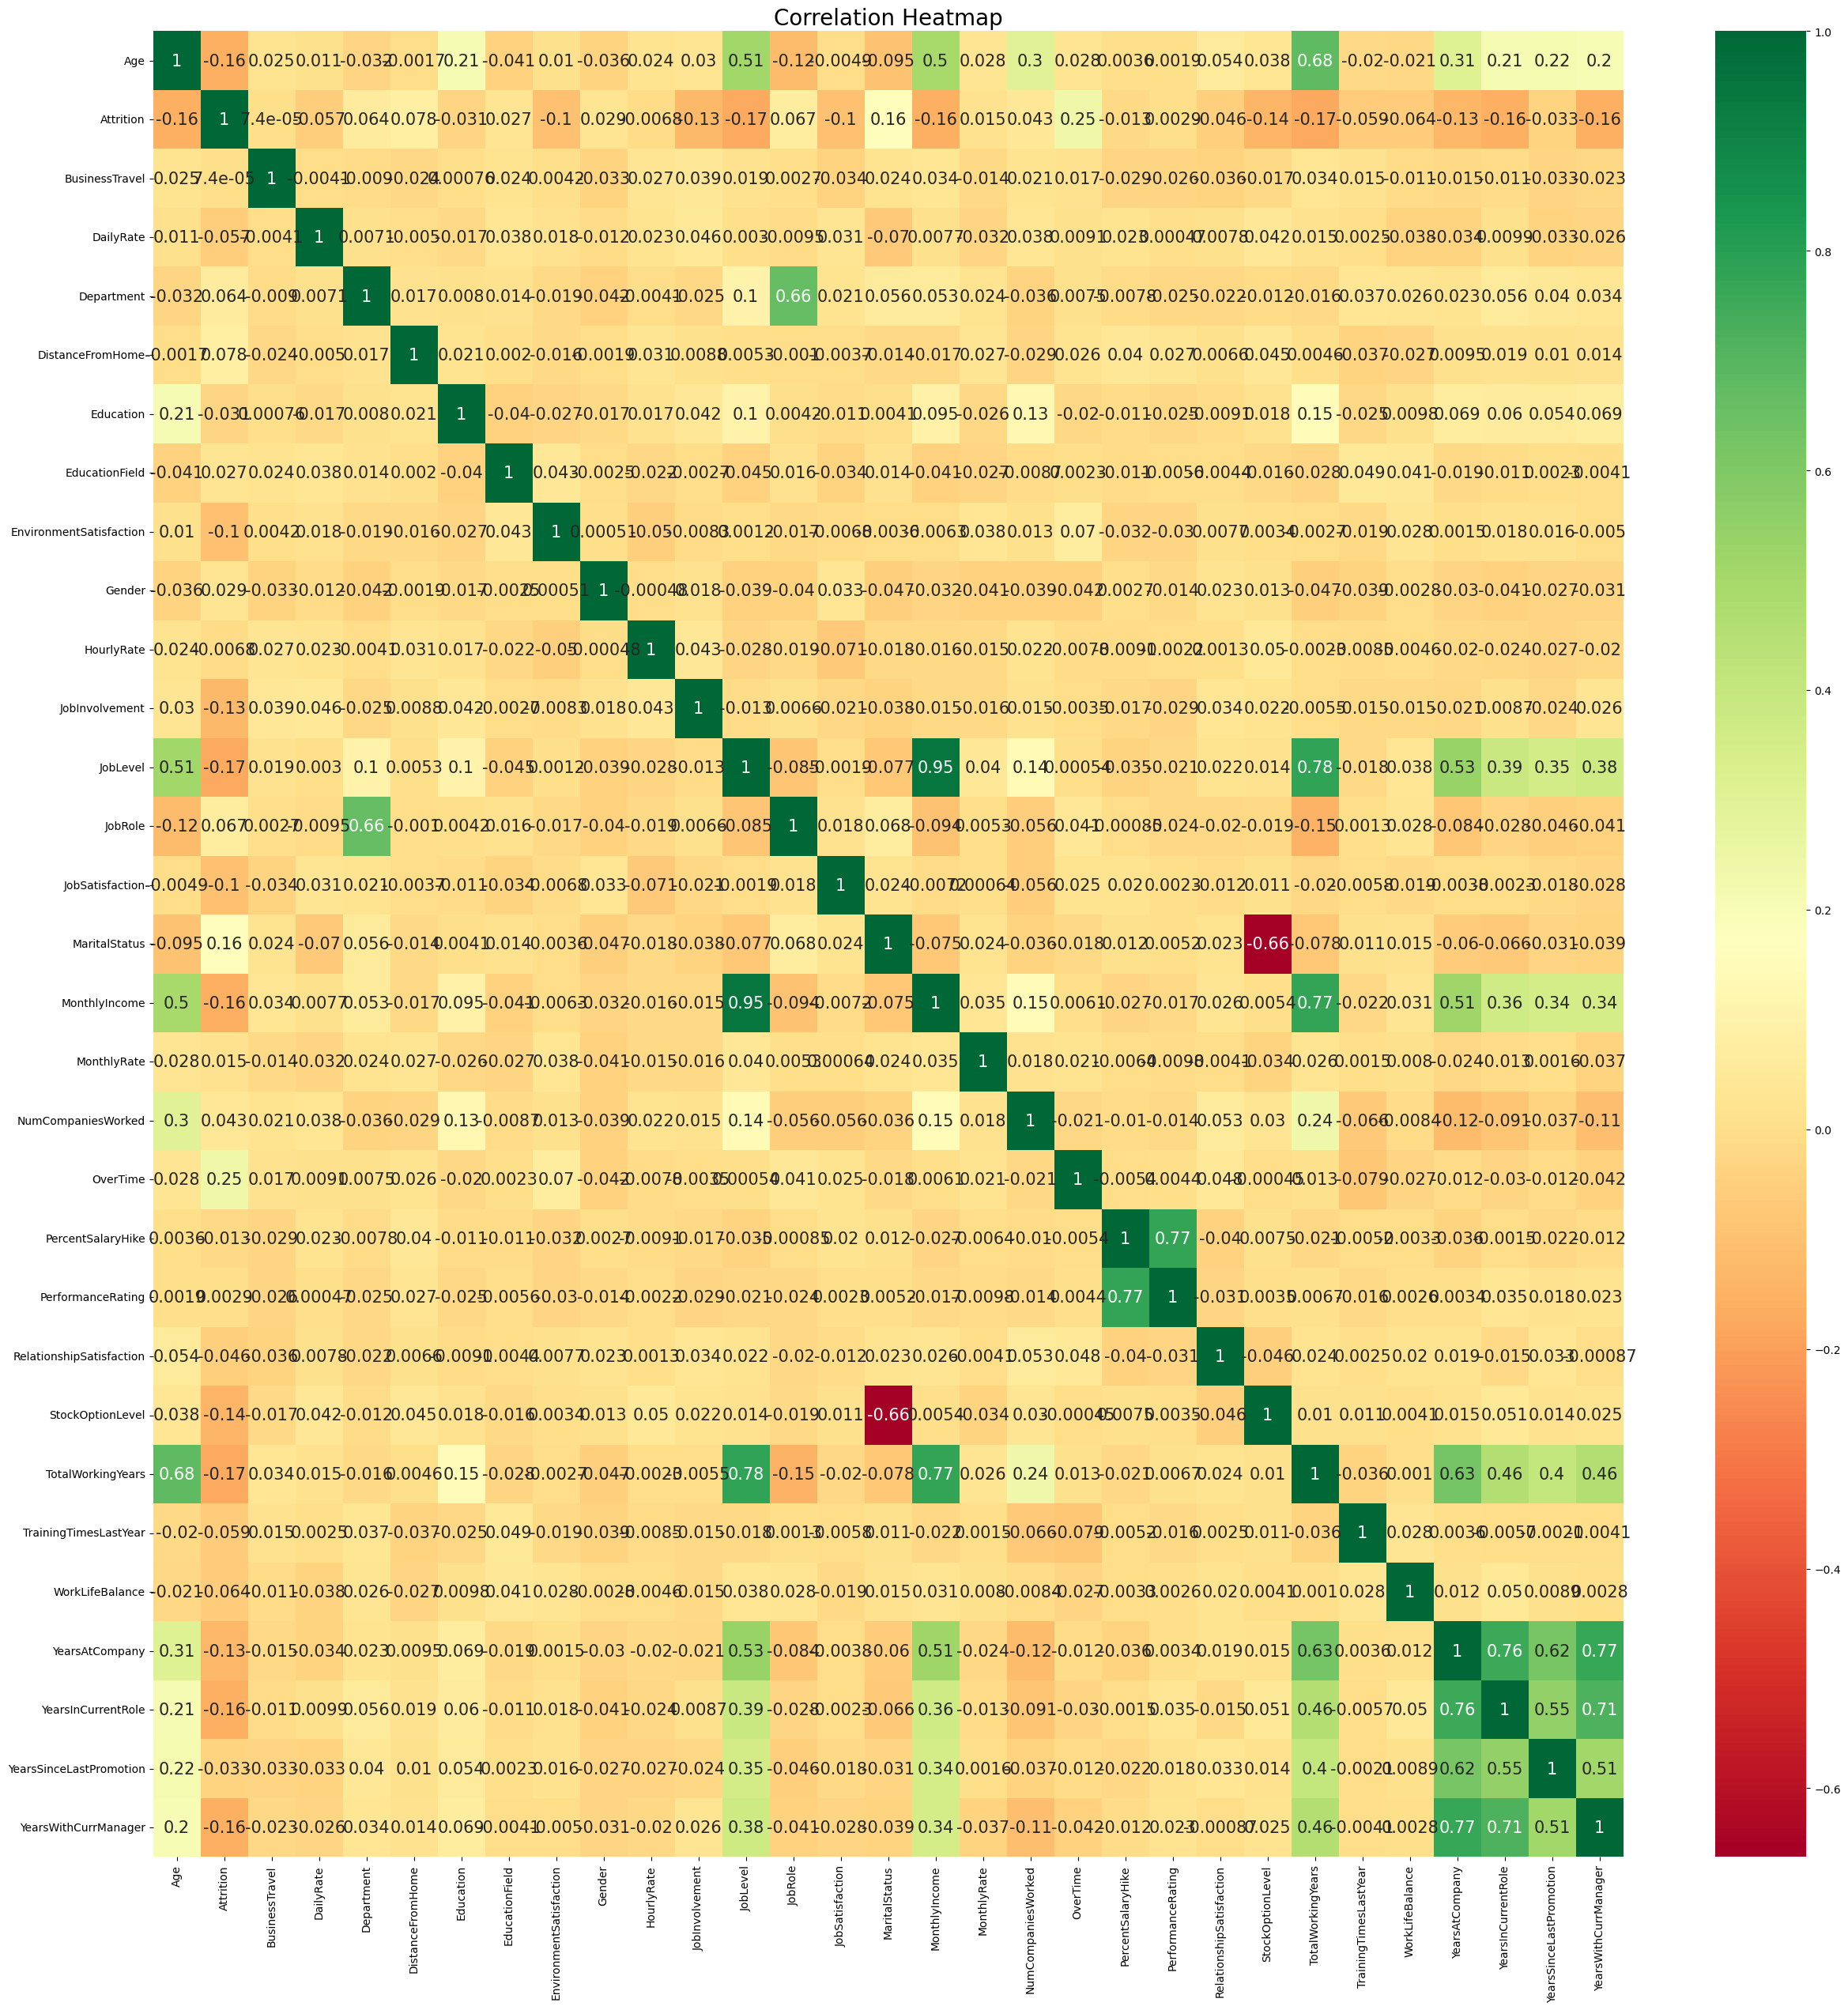

In [34]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_encoded.corr(), annot=True, cmap="RdYlGn", annot_kws={"size": 15})
plt.title("Correlation Heatmap", fontsize=20)
plt.show()


In [35]:
# Now safely compute correlation with encoded 'Attrition'
col = df_encoded.corr().nlargest(20, "Attrition")["Attrition"].index

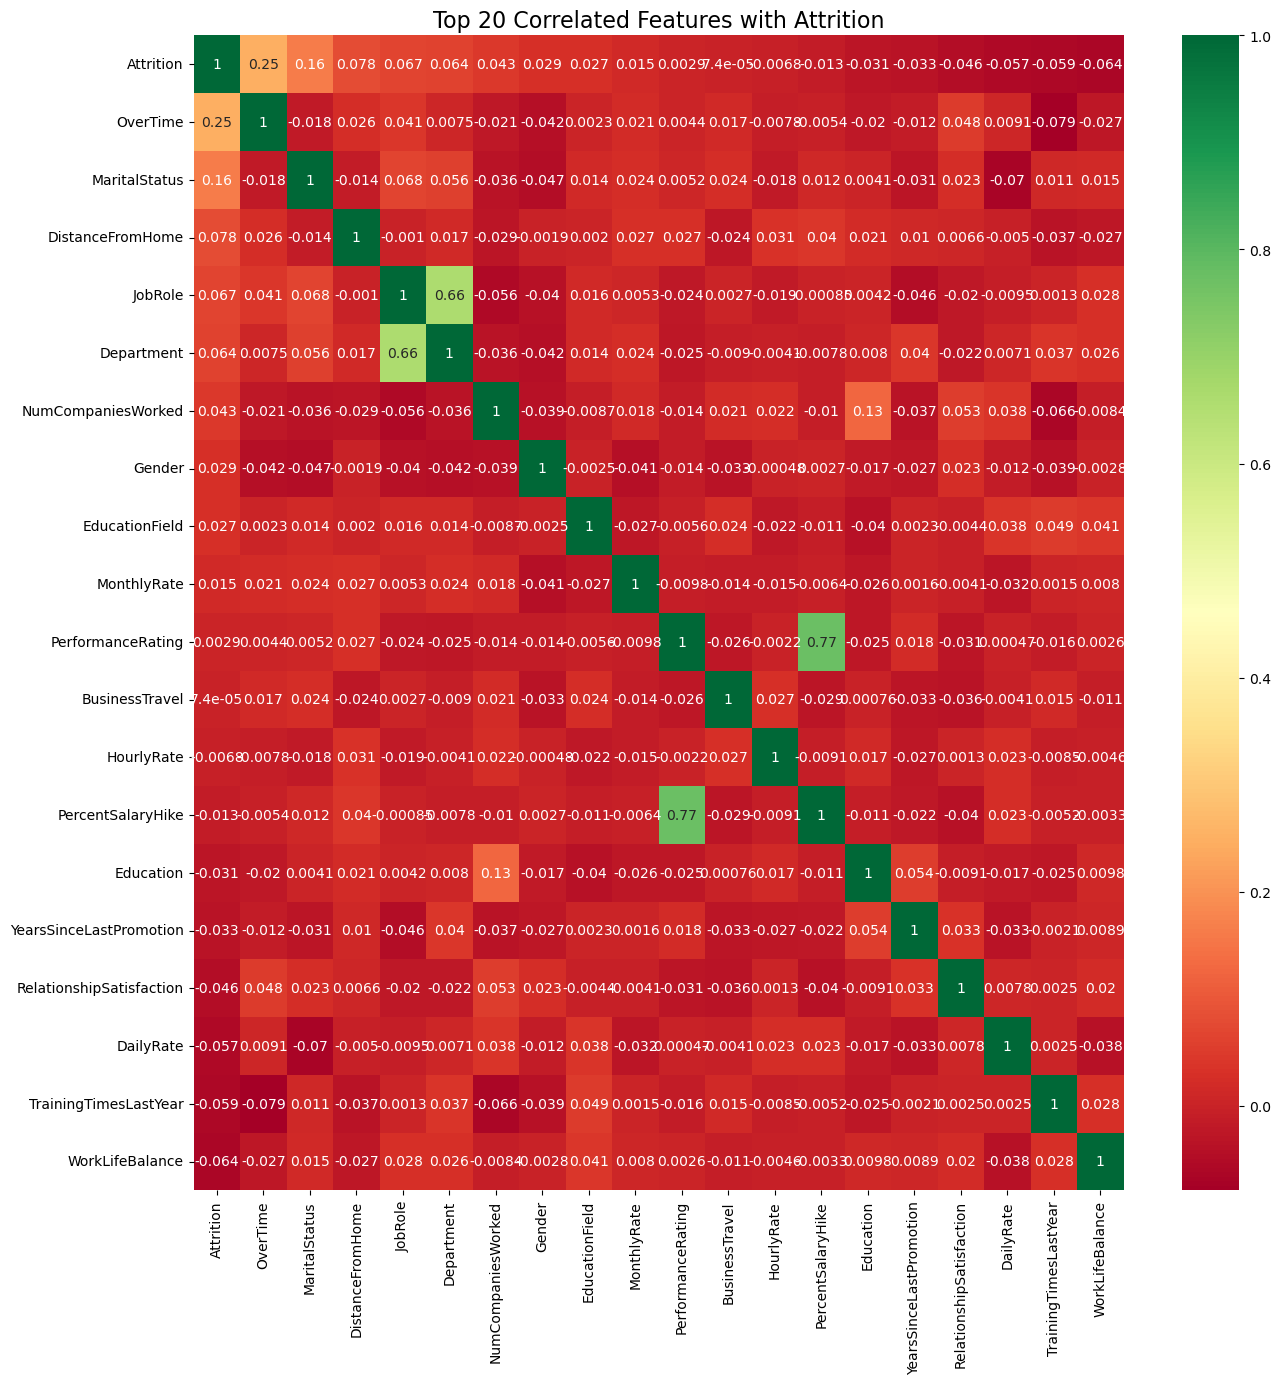

In [36]:
# Plot heatmap of top 20 correlated features
plt.figure(figsize=(15, 15))
sns.heatmap(df_encoded[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size": 10})
plt.title("Top 20 Correlated Features with Attrition", fontsize=16)
plt.show()

In [37]:
# Now you can compute and plot correlations
df_encoded.drop('Attrition', axis=1).corrwith(df_encoded['Attrition']).hvplot.barh(
    title="Feature Correlation with Attrition",
    width=600,
    height=600,
    color='correlation',
    cmap='RdYlGn')

:Bars   [index]   (0)

 Data Processing

In [38]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int32(1), int64(8), uint8(127)
memory usage: 280.1 KB


In [39]:
data.shape

(1470, 136)

In [40]:
data.duplicated ().sum()

0

<Axes: >

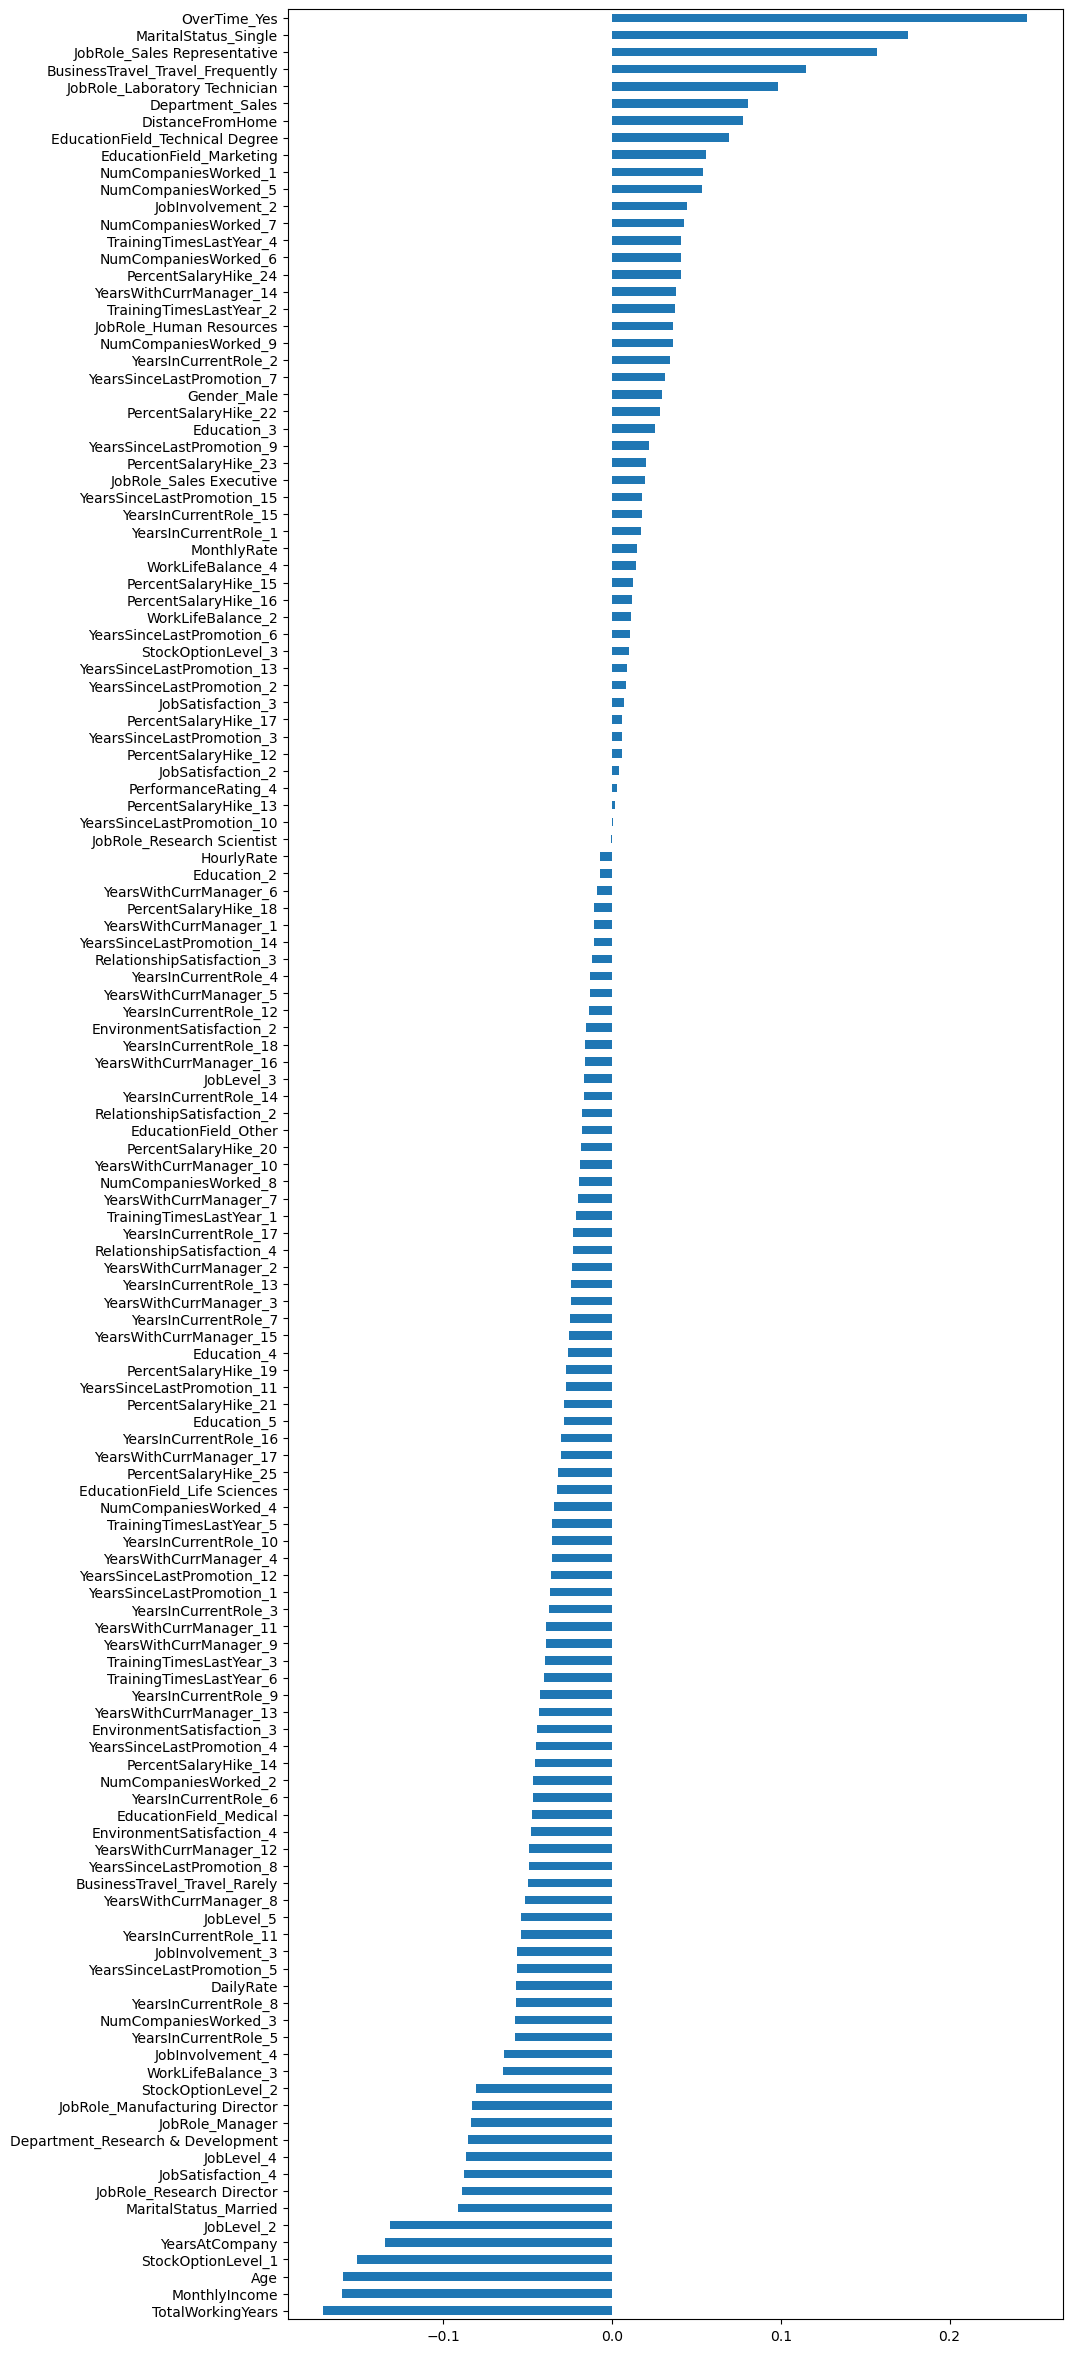

In [41]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [42]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

92

 Applying machine learning algorithms

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [44]:
X = data.drop('Attrition', axis=1)
y = data.Attrition

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [46]:
scaler = StandardScaler()

In [47]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [48]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [49]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

We have an imbalanced data, so if we predict that all our employees will stay we'll have an accuracy of 83.90%.



In [50]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("---------------------TRAIN-------------------")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")


---------------------TRAIN-------------------
Staying Rate: 83.87%
Leaving Rate: 16.13%


In [51]:
stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("-------------------------Test----------------------")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

-------------------------Test----------------------
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score


In [53]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: ")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: ")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [80]:
evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[849  14]
 [ 59 107]]
ACCURACY SCORE:
0.9291
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.935022    0.884298  0.929057     0.909660      0.926839
recall       0.983778    0.644578  0.929057     0.814178      0.929057
f1-score     0.958780    0.745645  0.929057     0.852212      0.924397
support    863.000000  166.000000  0.929057  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[348  22]
 [ 43  28]]
ACCURACY SCORE:
0.8526
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.890026   0.560000  0.852608    0.725013      0.836892
recall       0.940541   0.394366  0.852608    0.667453      0.852608
f1-score     0.914586   0.462810  0.852608    0.688698      0.841851
support    370.000000  71.000000  0.852608  441.000000    441.000000


In [81]:
from sklearn.metrics import precision_recall_curve, roc_curve

In [82]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")

In [83]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


In [84]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))


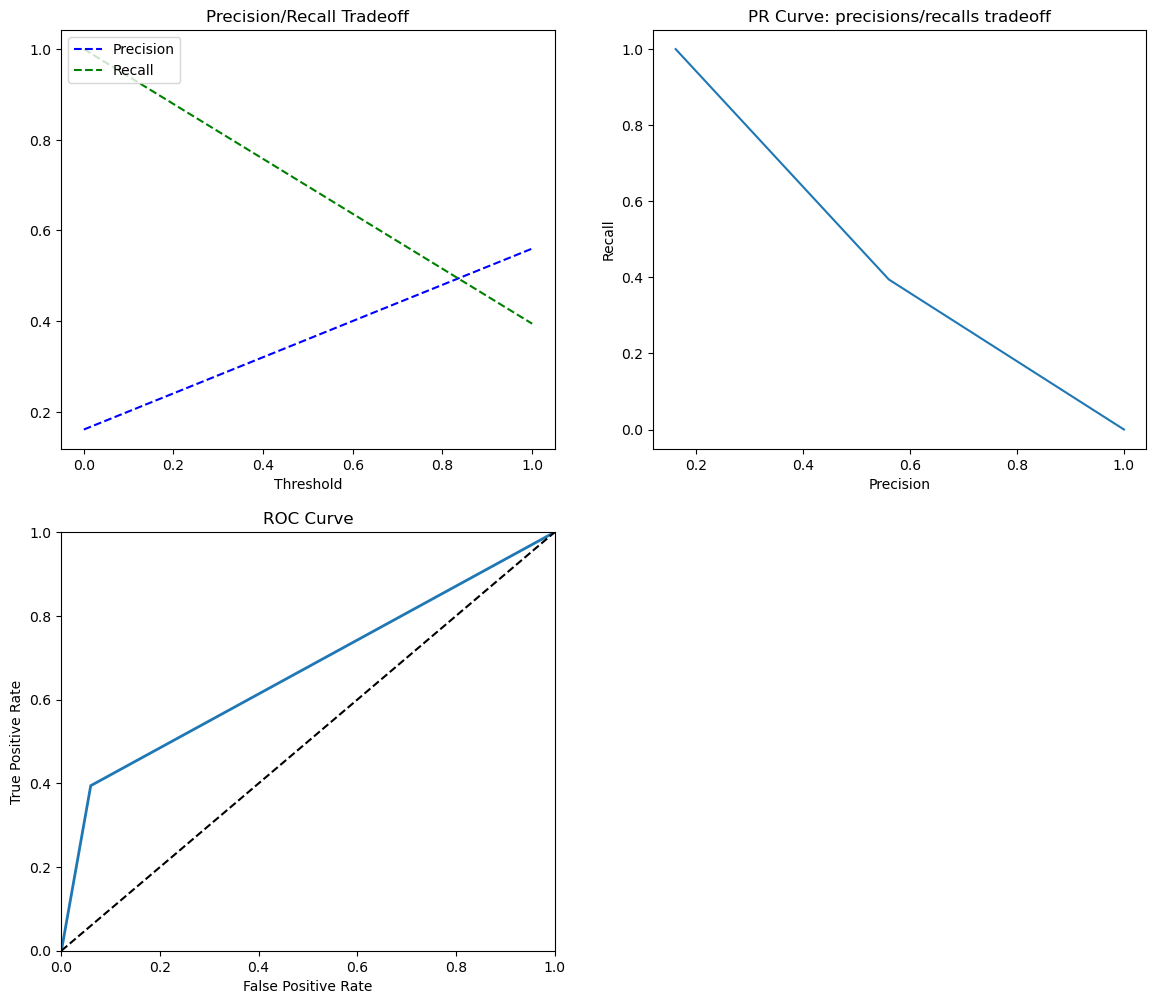

In [85]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [88]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test_std)),},}

Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[360  10]
 [ 61  10]]
ACCURACY SCORE:
0.8390
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.855107   0.500000  0.839002    0.677553      0.797935
recall       0.972973   0.140845  0.839002    0.556909      0.839002
f1-score     0.910240   0.219780  0.839002    0.565010      0.799078
support    370.000000  71.000000  0.839002  441.000000    441.000000


In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [96]:
# Define distribution (you can keep the same ranges)
param_dist = dict(
    n_estimators= [100, 500, 900],
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None],
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4],
    bootstrap= [True, False])

In [97]:
rf_clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=param_dist,
    n_iter=30,  # Try only 30 random combinations instead of all 648
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
95 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Lalit Kar

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 5, 10, 15, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 900]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [98]:
# Fit best model
rf_clf = RandomForestClassifier(**random_search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 31 135]]
ACCURACY SCORE:
0.9699
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.965324    1.000000  0.969874     0.982662      0.970918
recall       1.000000    0.813253  0.969874     0.906627      0.969874
f1-score     0.982356    0.897010  0.969874     0.939683      0.968588
support    863.000000  166.000000  0.969874  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[365   5]
 [ 66   5]]
ACCURACY SCORE:
0.8390
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.846868   0.500000  0.839002    0.673434      0.791023
recall       0.986486   0.070423  0.839002    0.528455      0.839002
f1-score     0.911361   0.123457  0.839002    0.517409      0.784510
support    370.000000  71.000000  0.839002  441.000000    441.000000


In [99]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))


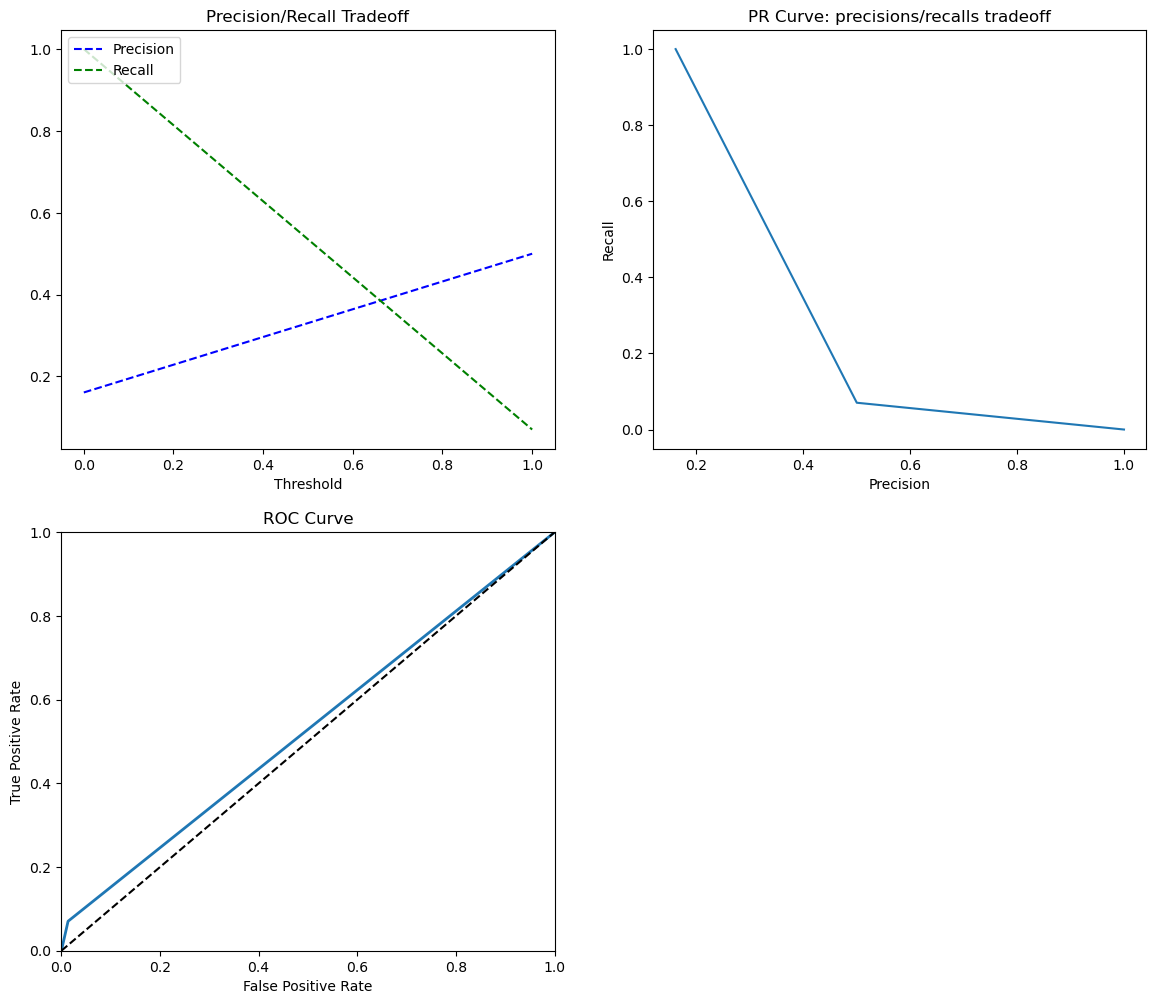

In [100]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [101]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)), }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

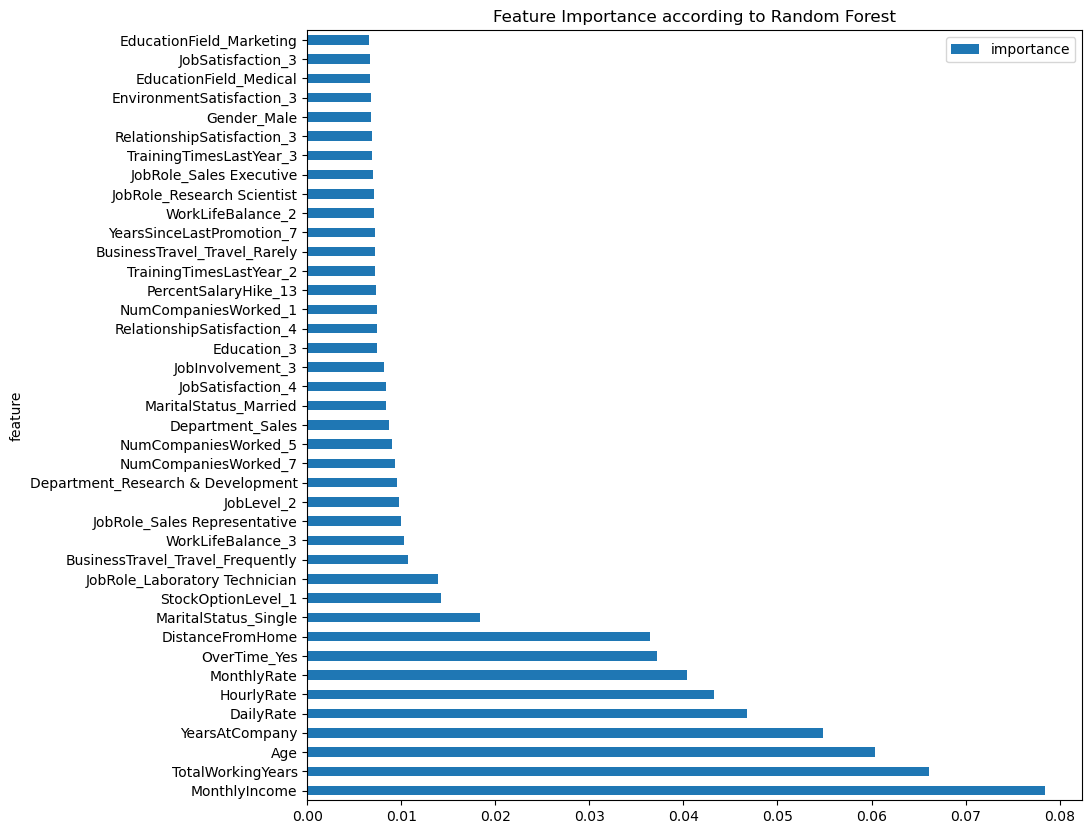

In [102]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

 Support Vector Machine

In [103]:
from sklearn.svm import SVC

In [104]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

SVC(kernel='linear')

In [105]:
evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[855   8]
 [ 47 119]]
ACCURACY SCORE:
0.9466
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.947894    0.937008   0.94655     0.942451      0.946137
recall       0.990730    0.716867   0.94655     0.853799      0.946550
f1-score     0.968839    0.812287   0.94655     0.890563      0.943583
support    863.000000  166.000000   0.94655  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[345  25]
 [ 44  27]]
ACCURACY SCORE:
0.8435
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.886889   0.519231  0.843537    0.703060      0.827697
recall       0.932432   0.380282  0.843537    0.656357      0.843537
f1-score     0.909091   0.439024  0.843537    0.674058      0.833411
support    370.000000  71.000000  0.843537  441.000000    441.000000


In [106]:
svm_clf = SVC(random_state=42)

In [107]:
param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]

In [109]:
random_search = RandomizedSearchCV(
    svm_clf,
    param_distributions=param_grid,  # use the same grid
    n_iter=10,  # Try only 10 random combinations
    scoring='roc_auc',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1)
random_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'kernel': ['linear']},
                                        {'C': [1, 10, 100, 1000],
                                         'gamma': [0.001, 0.0001],
                                         'kernel': ['rbf']}],
                   random_state=42, scoring='roc_auc', verbose=1)

In [111]:
svm_clf = SVC(**random_search.best_params_, random_state=42)
svm_clf.fit(X_train_std, y_train)
evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[862   1]
 [  6 160]]
ACCURACY SCORE:
0.9932
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.993088    0.993789  0.993197     0.993438      0.993201
recall       0.998841    0.963855  0.993197     0.981348      0.993197
f1-score     0.995956    0.978593  0.993197     0.987275      0.993155
support    863.000000  166.000000  0.993197  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[346  24]
 [ 42  29]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.891753   0.547170   0.85034    0.719461      0.836276
recall       0.935135   0.408451   0.85034    0.671793      0.850340
f1-score     0.912929   0.467742   0.85034    0.690335      0.841255
support    370.000000  71.000000   0.85034  441.000000    441.000000


In [112]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))

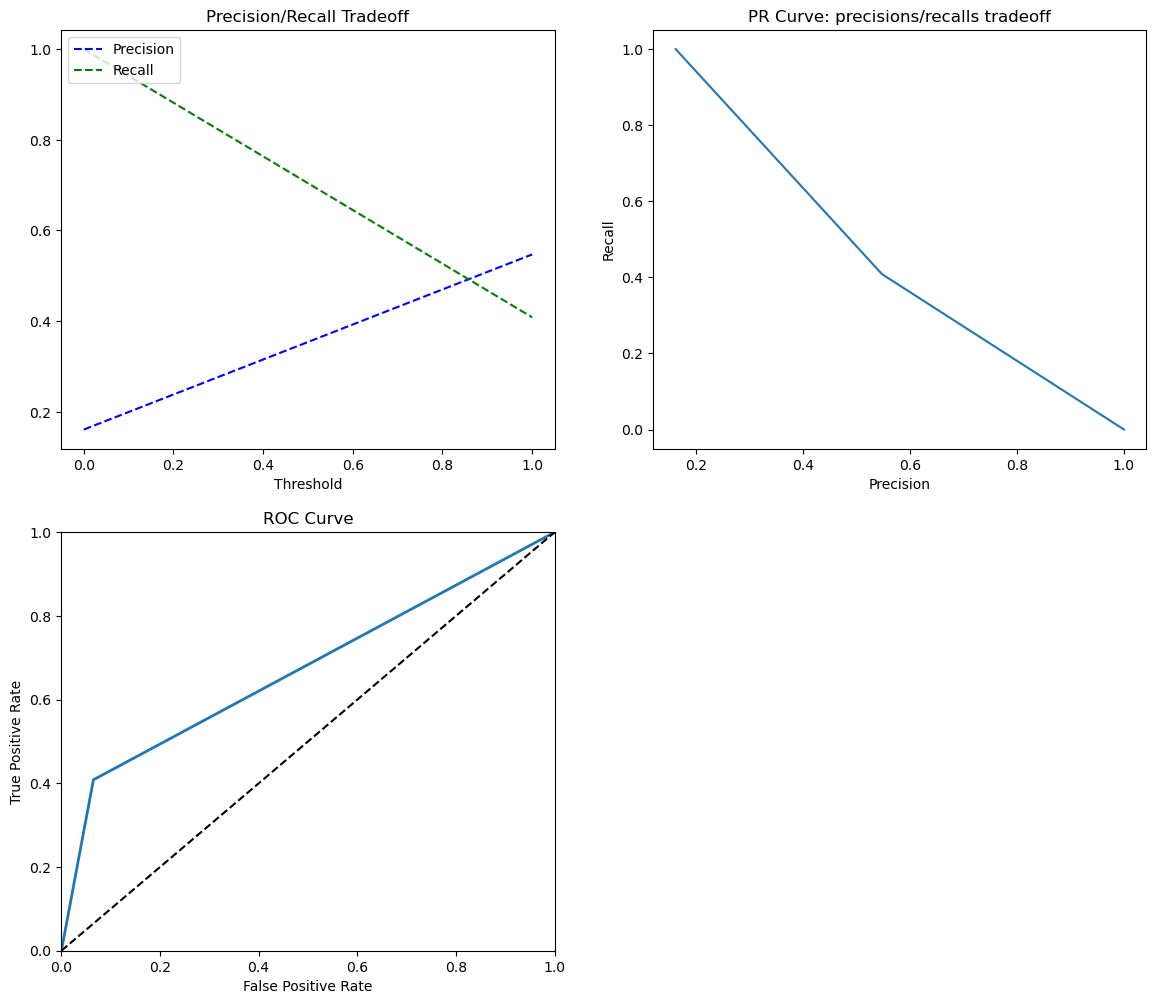

In [113]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [114]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),}

XGBoost Classifier

In [115]:
from xgboost import XGBClassifier

In [116]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [118]:
evaluate(xgb_clf, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[356  14]
 [ 51  20]]
ACCURACY SCORE:
0.8526
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.874693   0.588235  0.852608    0.731464      0.828574
recall       0.962162   0.281690  0.852608    0.621926      0.852608
f1-score     0.916345   0.380952  0.852608    0.648649      0.830148
support    370.000000  71.000000  0.852608  441.000000    441.000000


In [119]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),}

In [120]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))

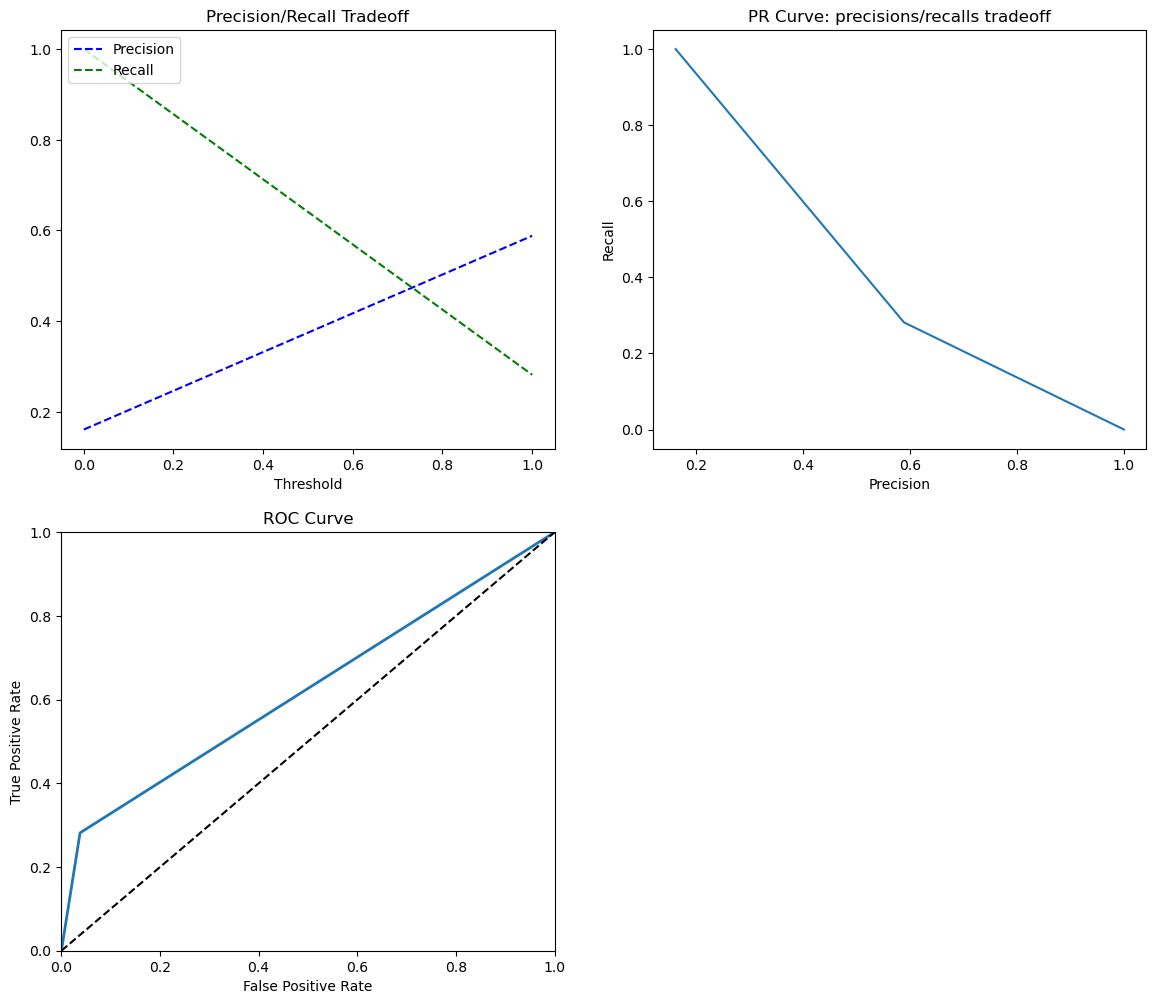

In [121]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

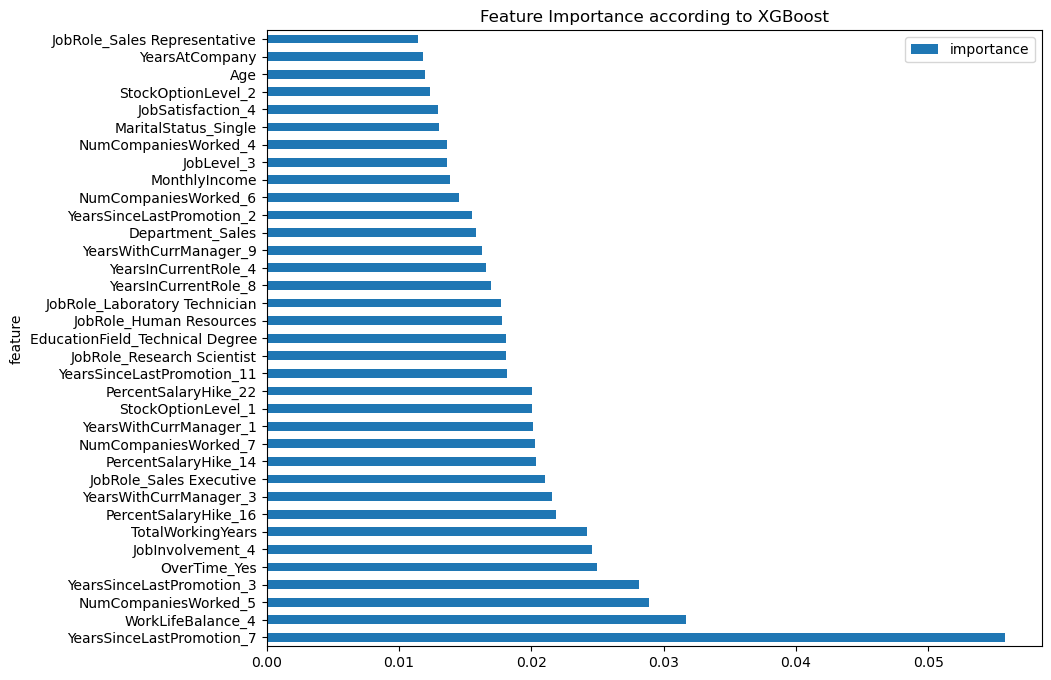

In [122]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

 LightGBM

In [125]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.5 MB 13.0 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 3.2 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.5 MB 2.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.5 MB 1.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 1.6 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 1.6 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.5 MB 1.5 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.5 MB 1.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.5 MB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 1.5 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.6 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.5 MB 1.6 MB/s eta 0:00:01
   ---------------

In [126]:
from lightgbm import LGBMClassifier

In [127]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427


LGBMClassifier()

In [128]:
evaluate(lgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[357  13]
 [ 53  18]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.870732   0.580645   0.85034    0.725688      0.824028
recall       0.964865   0.253521   0.85034    0.609193      0.850340
f1-score     0.915385   0.352941   0.85034    0.634163      0.824832
support    370.000000  71.000000   0.85034  441.000000    441.000000


In [129]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lgb_clf.predict(X_test))

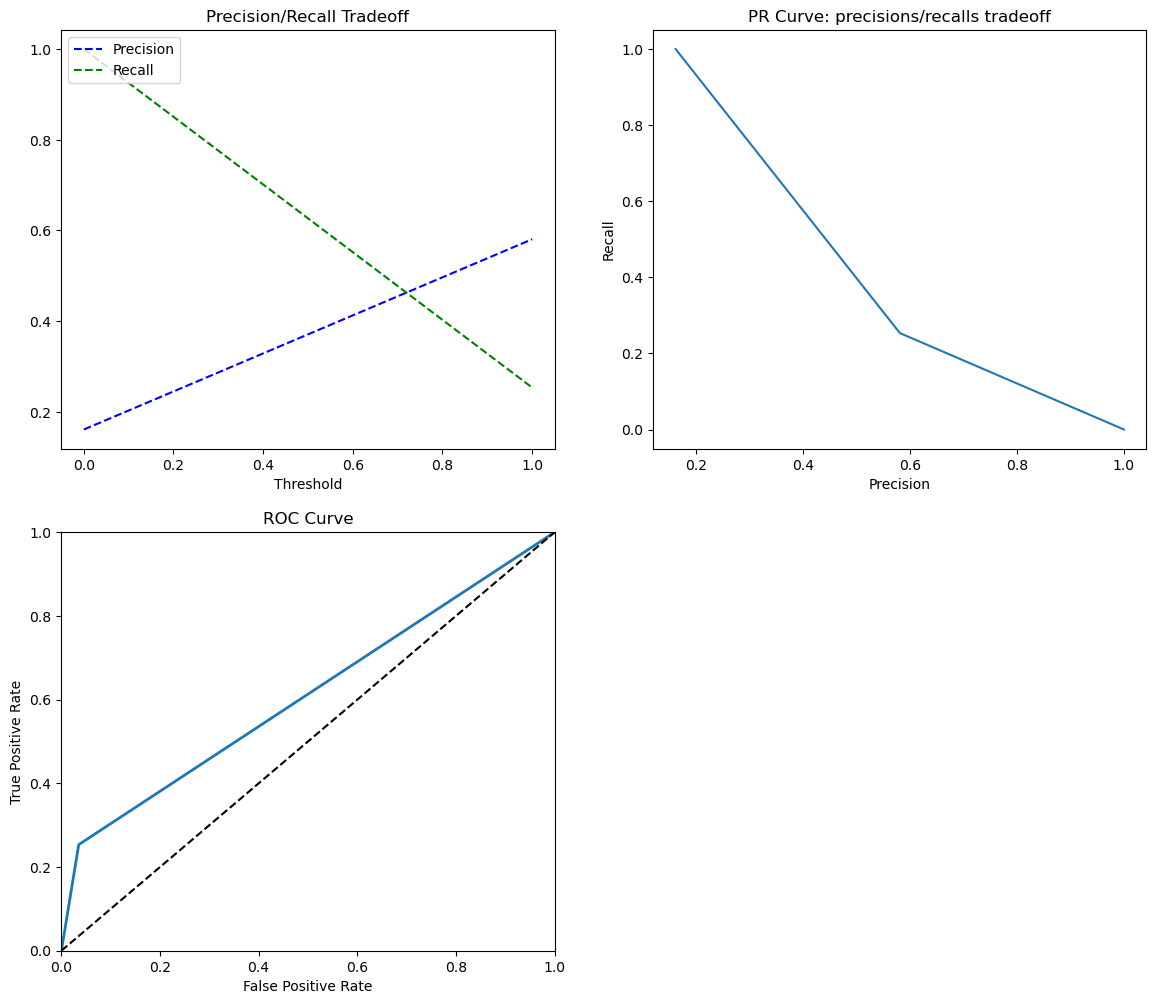

In [130]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)


In [131]:
scores_dict['LightGBM'] = {
        'Train': roc_auc_score(y_train, lgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lgb_clf.predict(X_test)),}


 CatBoost

In [133]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/102.4 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.2/102.4 MB 1.7 MB/s eta 0:00:59
   ---------------------------------------- 0.3/102.4 MB 1.4 MB/s eta 0:01:12
   ---------------------------------------- 0.3/102.4 MB 1.6 MB/s eta 0:01:05
   ---------------------------------------- 0.4/102.4 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.5/102.4 MB 1.7 MB/s eta 0:01:02
   ---------------------------------------- 0.6/102.4 MB 1.6 MB/s eta 0:01:02
   ---------------------------------------- 0.6/102.4 MB 1.5 MB/s eta 0:01:10
   ---------------------------------------- 1.0/102.4 MB 2.0 MB/s eta 0:00:50
   ---------------------------------------- 1.0/102.4 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 1.1/102.4 MB 1.9 MB/s eta 0:00:53


In [134]:
from catboost import CatBoostClassifier


In [135]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

In [136]:
evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 16 150]]
ACCURACY SCORE:
0.9845
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.981797    1.000000  0.984451     0.990899      0.984734
recall       1.000000    0.903614  0.984451     0.951807      0.984451
f1-score     0.990815    0.949367  0.984451     0.970091      0.984129
support    863.000000  166.000000  0.984451  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[361   9]
 [ 57  14]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.863636   0.608696   0.85034    0.736166      0.822591
recall       0.975676   0.197183   0.85034    0.586429      0.850340
f1-score     0.916244   0.297872   0.85034    0.607058      0.816687
support    370.000000  71.000000   0.85034  441.000000    441.000000


In [137]:
precisions, recalls, thresholds = precision_recall_curve(y_test, cb_clf.predict(X_test))

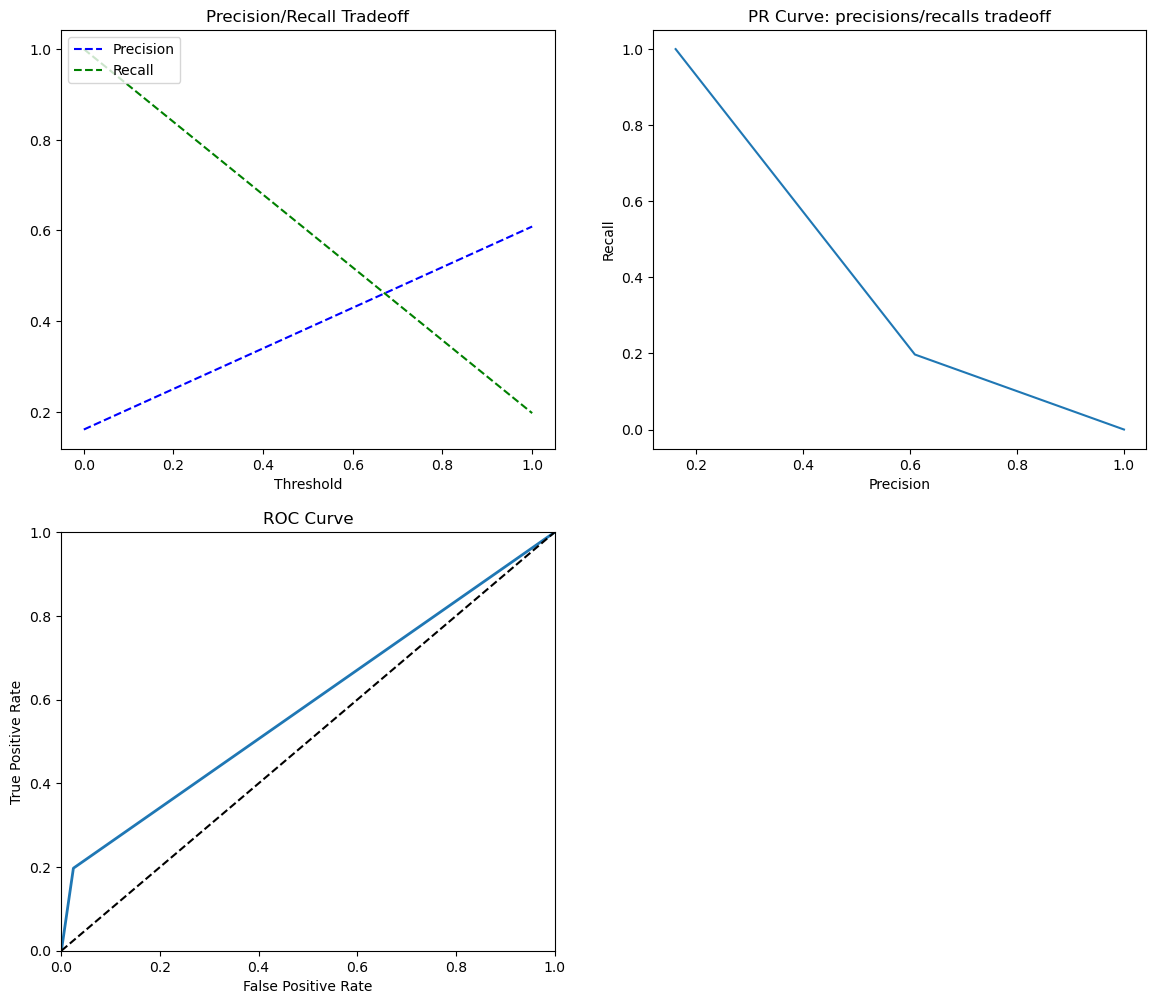

In [138]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, cb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)


In [139]:
scores_dict['CatBoost'] = {
        'Train': roc_auc_score(y_train, cb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, cb_clf.predict(X_test)),}

AdaBoost

In [142]:
from sklearn.ensemble import AdaBoostClassifier

In [143]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [144]:
evaluate(ab_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[843  20]
 [ 88  78]]
ACCURACY SCORE:
0.8950
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.905478    0.795918  0.895044     0.850698      0.887804
recall       0.976825    0.469880  0.895044     0.723352      0.895044
f1-score     0.939799    0.590909  0.895044     0.765354      0.883516
support    863.000000  166.000000  0.895044  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[344  26]
 [ 52  19]]
ACCURACY SCORE:
0.8231
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.868687   0.422222  0.823129    0.645455      0.796807
recall       0.929730   0.267606  0.823129    0.598668      0.823129
f1-score     0.898172   0.327586  0.823129    0.612879      0.806309
support    370.000000  71.000000  0.823129  441.000000    441.000000


In [145]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ab_clf.predict(X_test))

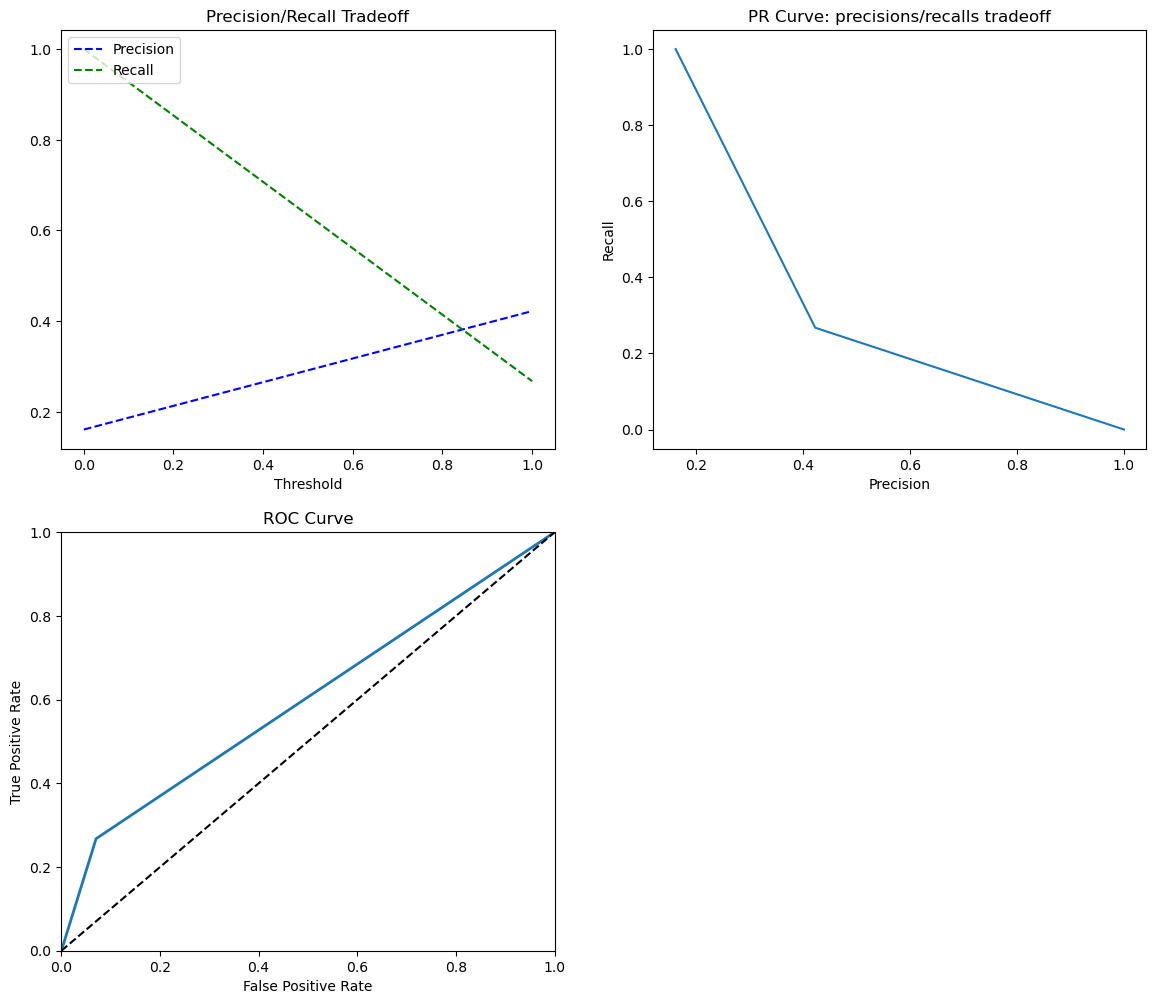

In [146]:
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ab_clf.predict(X_test))
plot_roc_curve(fpr, tpr)


In [147]:
scores_dict['AdaBoost'] = {
        'Train': roc_auc_score(y_train, ab_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, ab_clf.predict(X_test)),}

 Comparing Models Prerformance

In [149]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
    'LightGBM': lgb_clf,
    'CatBoost': cb_clf,
    'AdaBoost': ab_clf}


In [150]:
for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.528
XGBOOST                        roc_auc_score: 0.622


C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Lalit Karki\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


LOGISTIC REGRESSION            roc_auc_score: 0.546
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500
LIGHTGBM                       roc_auc_score: 0.609
CATBOOST                       roc_auc_score: 0.586
ADABOOST                       roc_auc_score: 0.599


In [151]:
scores_df = pd.DataFrame(scores_dict)
# scores_df.plot(kind='barh', figsize=(15, 8))
scores_df.hvplot.barh()

:Bars   [index,Variable]   (value)